**Data Loading and Preprocessing**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/heart-disease.csv')

# Handle missing values
df = df.fillna(df.median())

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])

# Head
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,True,False,False,True,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,0,1,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,178,0,0.8,0,1,...,False,True,False,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,0,1,...,False,True,False,False,False,True,False,False,True,False


**Data Analysis**

In [9]:
# Average age of patients with and without heart disease
avg_age_with_heart_disease = df[df['target'] == 1]['age'].mean()
avg_age_without_heart_disease = df[df['target'] == 0]['age'].mean()

# Distribution of chest pain types among patients
chest_pain_distribution = df['cp'].value_counts()

# Correlation between thalach (maximum heart rate) and age
correlation_thalach_age = df['thalach'].corr(df['age'])

# Effect of sex on the presence of heart disease
sex_effect_on_heart_disease = df.groupby('sex')['target'].mean()

**Data Visualization**

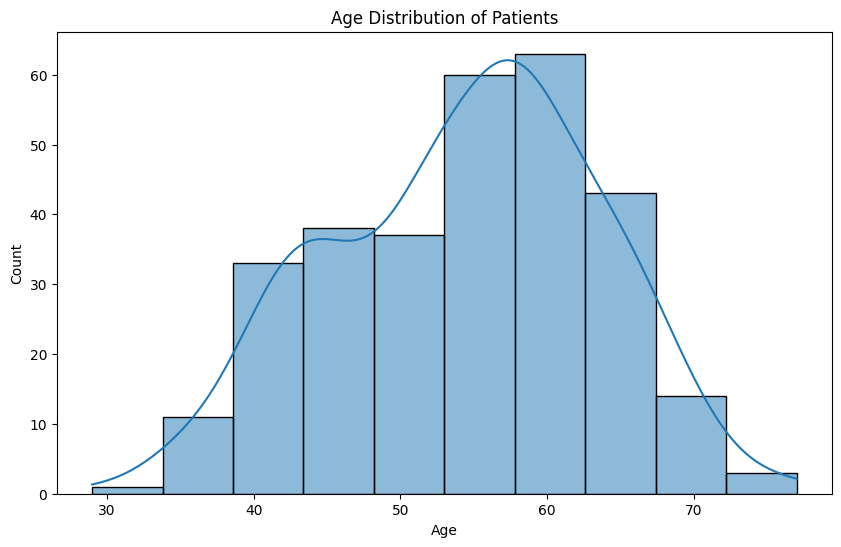

In [11]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

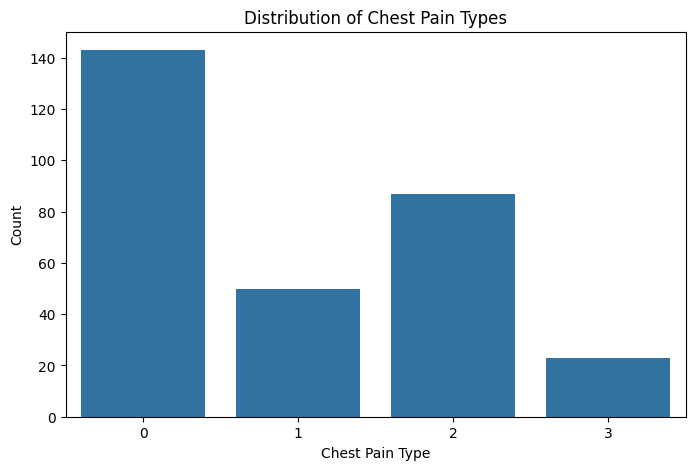

In [12]:
# Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', data=df)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

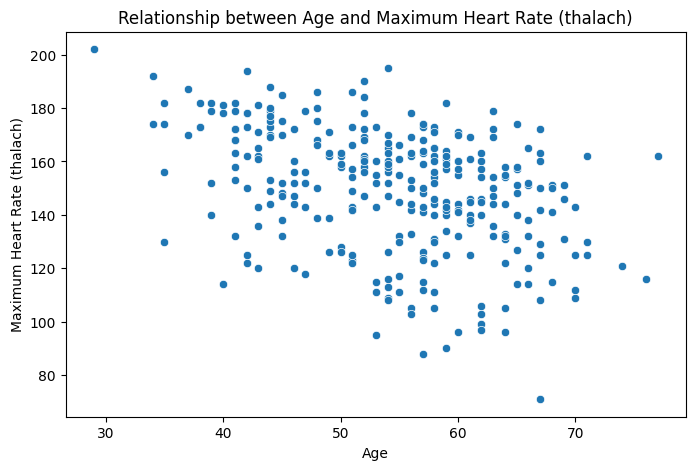

In [13]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='thalach', data=df)
plt.title('Relationship between Age and Maximum Heart Rate (thalach)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

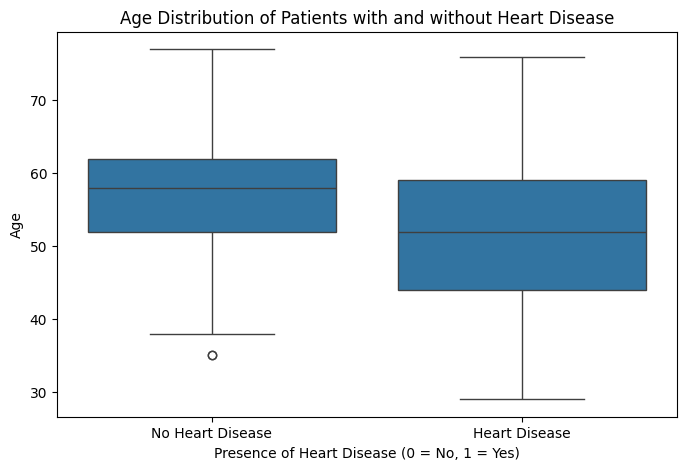

In [14]:
# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

**Advanced Analysis (using numpy)**

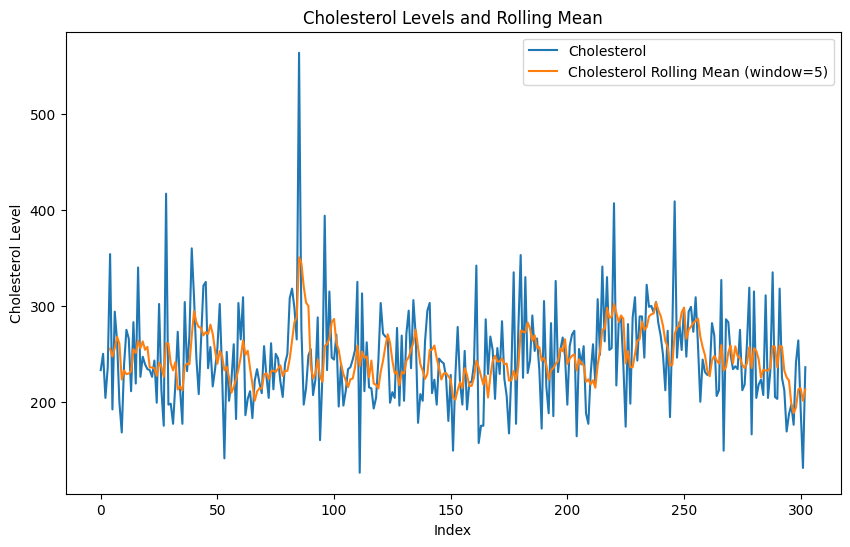

In [15]:
# Correlation matrix for all numerical features in the dataset
correlation_matrix = df.corr()

# Rolling mean analysis on the cholesterol levels with a window size of 5
df['chol_rolling_mean'] = df['chol'].rolling(window=5).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['chol'], label='Cholesterol')
plt.plot(df['chol_rolling_mean'], label='Cholesterol Rolling Mean (window=5)')
plt.title('Cholesterol Levels and Rolling Mean')
plt.xlabel('Index')
plt.ylabel('Cholesterol Level')
plt.legend()
plt.show()